#Encontro 09

**Preparo Prévio:**
1. Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Seção 6.2 (pág. 189).

**Hoje:**
1. Descrever modelos contínuos quanto aos resultados teóricos.
2. Explicar a utilização de modelos probabilísticos no contexto da literatura estatística.
3. Contrastar resultados teóricos e empíricos.
4. Fechamento do conteúdo.

**Próxima aula:**
> 1. Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Seção 5.1 (pág. 137) e Seção 5.2 (pág. 146).

In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

Nessa aula, teremos contato com algumas distribuições contínuas e como essas podem ser utilizadas para modelagem de dados reais.

**Distribuição Exponencial**

A distribuição Exponencial é conhecida, principalmente, por sua adequação na modelagem de variáveis que descrevem tempo de vida de produtos e materiais. Teoricamente, a função densidade de probabilidade (FDP) de uma distribuição Exponencial com parâmetro $\alpha$, com $\alpha > 0$, é definida por:

$$f(x;\alpha) = f(x) = \alpha e^{-\alpha x},$$

com $x \geq 0$. Quando uma variável $X$ tem distribuição Exponencial com parâmetro $\alpha$, pode-se afirmar que sua esperança e variância são dadas, respectivamente, por $E(X) = \frac{1}{\alpha}$ e $\mathrm{Var}(X) = \frac{1}{\alpha^2}$.

A Figura 1 mostra a distribuição Exponencial para alguns valores do parâmetro $\alpha = \frac{1}{2}; 1; \frac{3}{2}; 3$.

<img src="Exponencial1.png"/>
<center><sup>**Figura 1.** Função densidade de probabilidade da Exponencial para alguns valores de $\alpha$.</sup></center>

Para calcular a probabilidade da variável $X$ não exceder um valor $k$, é necessário obter a área abaixo da curva até esse ponto, isto é, calcular por integral a $P(X \leq k)$. Essa probabilidade pode ser obtida pela função de distribuição acumulada (FDA) no ponto $k$ que, no caso da Exponencial, é dada por:

$$F(k) = P(X \leq k) = \int^k_0 \alpha e^{-\alpha x} dx = 1 - e^{-\alpha k}$$

A Figura 2 mostra a função de distribuição acumulada da Exponencial para alguns valores do parâmetro $\alpha = \frac{1}{2}; 1; \frac{3}{2}; 3$.

<img src="Exponencial2.png"/>
<center><sup>**Figura 2.** Função de distribuição acumulada da Exponencial para alguns valores de $\alpha$.</sup></center>

Como notação, utiliza-se $X \sim \mathrm{Exp}(\alpha)$ e lê-se: “a variável $X$ segue uma distribuição Exponencial com parâmetro $\alpha$”.

> **O que ajuda e o que atrapalha as vendas pela internet**

> *Assim como no desenho animado da Warner em que o Coiote persegue o Papa-Léguas, na internet o mais rápido leva a melhor. Um levantamento recente da consultoria americana Aberdeen Group mostra que, a cada segundo que uma página de uma loja online demora para carregar, há uma queda de 7% na conversão de vendas.*

> <sup>Fonte: http://exame.abril.com.br/revista-exame-pme/edicoes/75/noticias/venda-muito-mais-pela-internet</sup>

1) Considere a variável $T$: tempo, em segundos, para abertura de um site de loja virtual de domínio brasileiro com média igual a $1.03$ segundos e que essa variável seja modelada por uma distribuição Exponencial.

1.1. A linha de comando descrita a seguir carrega uma base de dados com uma amostra dos tempos de carregamento de 100 lojas virtuais. 



Sabe-se que, se coincidirem com a distribuição teórica, os dados concordariam com uma distribuição exponencial  $T \sim \mathrm{Exp}\left(\frac{1}{1.03}\right)$. 

Compare a média (valor esperado) e a variância da amostra com as da distribuição exponencial com $\alpha = \left(\frac{1}{1.03}\right) $. A amostra seria bem modelada (ou seja descrita, resumida) por esta distribuição?

In [2]:
tempos = pd.Series.from_csv("tempos.csv")

In [3]:
media_real = tempos.mean()
media_real

0.8596562354426177

In [4]:
alfa = 1/1.03
media_esperada = 1/alfa
media_esperada

1.03

In [5]:
variancia_real = tempos.var()
variancia_real

0.9103308633357287

In [6]:
variancia_esperada = 1/(alfa)**2
variancia_esperada

1.0609

In [7]:
#a amostra não seria bem modelada uma vez que as medias são diferentes

1.2. Graficamente, há algumas opções para levantar indícios se uma distribuição de probabilidade irá fornecer um ajuste razoável aos dados. Dentre essas opções, temos:

* Histograma dos dados *versus* função densidade de probabilidade teórica.

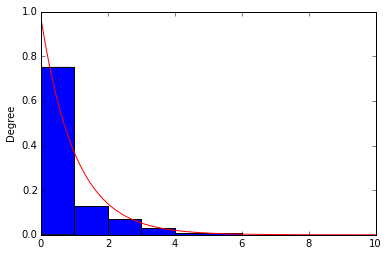

In [8]:
mu = 1.03
n = 100

# histograma e densidade teórica
pd.DataFrame.plot(kind='hist', data=tempos, bins=range(0, 11), normed=True, legend=False)
a = pd.Series(range(1, 1001)) / 100
plt.plot(a, stats.expon.pdf(a, scale=mu), '-', color='red')

In [9]:
#Nesse modelo a função densidade de probabilidade teorica representa de certa forma razoavel os dados coletados

* Quantis empíricos (dados ordenados) *versus* quantis teóricos.

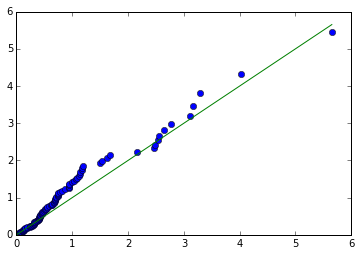

In [10]:
# dados ordenados e quantis teóricos - QQplot
#tempos = tempos.copy()
tempos = tempos.sort(inplace=False)
fra = [] # frequencia relativa acumulada
for i in range(n):
  fra.append((i + 0.5) / n) # ver Magalhães e Lima (pag. 195)

q = stats.expon.ppf(fra, scale=mu) # quantis teóricos

plt.plot(tempos, q, 'o')
plt.plot((min(tempos), max(tempos)), (min(tempos), max(tempos)), '-')

In [11]:
#Esse modelo descreve os dados obtidos bem, uma vez que o modelo indica crescimento, porem parte dos dados reais não crescem na proporção de 1 para 1 como o modelo indica. 


* Frequência relativa acumulada (a partir dos dados) *versus* função de distribuição acumulada.

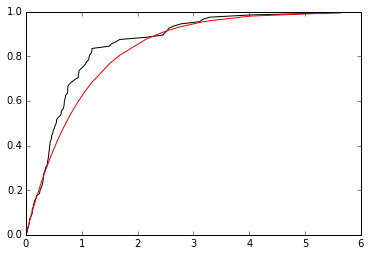

In [12]:
# fra e FDA
fda = stats.expon.cdf(tempos, scale=mu) #FDA

plt.plot(tempos, fra, '-', color='black')
plt.plot(tempos, fda, '-', color='red')

In [13]:
# Modelo da função de distribuição acumulada para certo valores de segundos representa os dados coerentemente. Para valores entre 0,5 segundo 
#a 2,5 segundo os dados reais divergem do modelo

In [14]:
#1.3

In [15]:
tabela = pd.DataFrame(data= fra, index = tempos)
tabela

,0
0.012487,0.005
0.022013,0.015
0.030483,0.025
0.044699,0.035
0.049616,0.045
0.062769,0.055
0.063465,0.065
0.073222,0.075
0.095159,0.085
0.110958,0.095


In [16]:


tabela2= pd.DataFrame(data= fda, index = tempos)
tabela2

,0
0.012487,0.012050
0.022013,0.021145
0.030483,0.029161
0.044699,0.042469
0.049616,0.047029
0.062769,0.059121
0.063465,0.059756
0.073222,0.068621
0.095159,0.088248
0.110958,0.102126


In [17]:
#1.3

# percentil de lojas que demoram mais de uma segundo para abrir o site = 1 - 0.745. A probabilidade do evento acontecer ´1 - 0.63 
# Os resultados deveriam ser iguais , uma vez que um é a frequencia relativa acumulada, que seriam os dados reais, e o outro ´a funçao
# da distribuição acumulada que é reflexo do modelo implementado

#1.4 Um modelo probabilistico é interessante, por mais que vc ja tenha dados experimentais, para prever futuros dados e inferir hipoteses 

Considerando os gráficos anteriores, descreva se há indícios de concordância entre modelo teórico e dados (amostra simulada). Note que seus argumentos devem ser respaldados em cada resultado gráfico.

1.3. Qual o % de lojas na amostra que demoram mais do que um segundo para abrir o site? E qual a probabilidade desse resultado acontecer? Esses resultados deveriam ser iguais? Por quê?

1.4. **Na prática, qual a necessidade de um modelo probabilístico já que se têm os dados observados?**

2) Há outros modelos probabilísticos contínuos:

* Uniforme
* Normal
* Gamma
* t-Student
* LogNormal
* Beta
* F-Snedecor


Cada grupo de alunos deve ficar com uma distribuição e deve realizar as seguintes atividades (**num IPython Notebook à parte**, que deve ser publicado no **Github** e ter seu link divulgado para a sala até 24/9):


2.1. Gere um plot da densidade de probabilidade da distribuição e de sua cumulativa. Descubra como usando o pacote scipy.stats

2.2. Qual a forma analítica (expressão) da distribuição?

2.3. Quais parâmetros descrevem a distribuição?

2.4. Existe uma fórmula específica para calcular esperança (média) e variáncia em função dos parâmetros?

2.5. Que tipo de aplicações tem esta distribuição? Em que tipo de dados é normalmente encontrada?

2.6. Essa distribuição é útil para a inferência estatística? (Os Capítulos 7 e 8 do Magalhães darão uma idéia de se sim ou não)


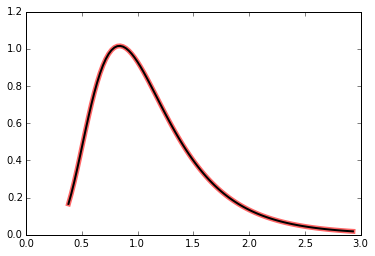

In [18]:
#2.1
from scipy.stats import f
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1)


dfn, dfd = 29, 18
mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')

#Display the probability density function (pdf):

x = np.linspace(f.ppf(0.01, dfn, dfd), f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='f pdf')
#Alternatively, freeze the distribution and display the frozen pdf:

rv = f(dfn, dfd)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

#Check accuracy of cdf and ppf:


vals = f.ppf([0.001, 0.5, 0.999], dfn, dfd)
np.allclose([0.001, 0.5, 0.999], f.cdf(vals, dfn, dfd))

#Generate random numbers:


r = f.rvs(dfn, dfd, size=1000)

In [ ]:
#2.2
f(x)= (T[m+n/2]*(m/n)**m/2*x**m/2-1)/T[m/2]*T[n/2]*[m/n]*n+1]**m+n/2

In [ ]:
#2.3
os paramentros que descrevem a função são m e n

In [ ]:
#2.4
E(x)=n/(n-2) </span><fontsize = "2"> se n>2

In [ ]:
#2.5
f snedecor é uma distribuição que exerce um papel importante na inferencia estatistica. 
Ela é utilizada para desdenvolver  regiões criticas, para hipoteses testadas e 
para construir intervalos confiaveis

In [ ]:
#2.6
Essa distribuição é util para inferencias estatisticas